In [1]:

import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


In [2]:
# Making dataset with 200 datasamples and 2 features
X, y, centers = make_blobs(n_samples=200, n_features=2, return_centers=True, random_state=0, cluster_std=0.5)

In [ ]:
# Cluster Centers
centers

array([[ 0.97627008,  4.30378733],
       [ 2.05526752,  0.89766366],
       [-1.52690401,  2.91788226]])

In [ ]:
type(X)

numpy.ndarray

In [ ]:
X[0]

array([-1.63035585,  3.35797172])

In [ ]:
type(y)

numpy.ndarray

In [ ]:
X.min(axis=0)

array([-2.85649013, -0.48863272])

In [ ]:
# Finding each axis minimum and maximum values
x0_min, x1_min, x0_max, x1_max = X.min(axis=0)[0], X.min(axis=0)[1], X.max(axis=0)[0], X.max(axis=0)[1]

In [ ]:
print(x0_min, x1_min, x0_max, x1_max)

-2.8564901322202756 -0.48863271827538823 3.2468399088648487 5.279175025064285


In [ ]:
# Generating random coordinates for initial cluster centroids
random_centers_x = np.random.uniform(x0_min, x0_max, 3)
random_centers_y = np.random.uniform(x1_min, x1_max, 3)

In [ ]:
print(random_centers_x)
print(random_centers_y)

[ 2.39831941 -1.70954975 -0.61445195]
[2.93412596 4.5031297  1.95225788]


In [ ]:
center_1 = np.array([random_centers_x[0], random_centers_y[0]])
center_2 = np.array([random_centers_x[1], random_centers_y[1]])
center_3 = np.array([random_centers_x[2], random_centers_y[2]])

In [ ]:
print(center_1)
print(center_2)
print(center_3)

[2.39831941 2.93412596]
[-1.70954975  4.5031297 ]
[-0.61445195  1.95225788]


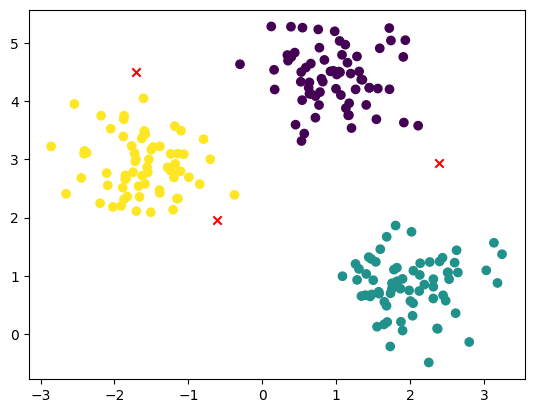

In [ ]:
# Plotting data and their initial centroids
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(random_centers_x, random_centers_y, c='red', marker='x')
plt.show()

In [ ]:
current_labels = np.array([])
current_labels

array([], dtype=float64)

K-means clustering algorithm training process:
1. Iterate over the entire dataset.
2. For each data point, calculate the Euclidean distance to each cluster center.
3. Assign each data point to the cluster with the nearest center.
4. After all data points have been assigned to clusters, calculate the sum of squared errors (SSE). This is the sum of the squared distances from each data point to its assigned cluster center.
5. Form arrays X_1, X_2, and X_3, which contain the data points assigned to each cluster.
6. Calculate the new centroid for each cluster by taking the mean of the data points in that cluster.
7. Repeat steps 2-6 until the SSE is below a certain threshold or the maximum number of iterations is reached.


In [ ]:
threshold = 50

[1. 0. 0. 1. 0. 2. 0. 0. 0. 2. 1. 2. 0. 0. 1. 2. 0. 0. 0. 1. 2. 0. 0. 0.
 2. 1. 2. 2. 1. 2. 0. 0. 2. 0. 0. 0. 0. 0. 0. 1. 0. 2. 1. 1. 0. 0. 0. 2.
 1. 0. 0. 0. 2. 1. 1. 2. 0. 0. 0. 0. 2. 2. 0. 0. 0. 1. 2. 0. 2. 0. 0. 1.
 1. 1. 1. 1. 0. 0. 0. 1. 2. 0. 0. 0. 0. 0. 0. 1. 1. 0. 2. 2. 0. 0. 0. 0.
 0. 2. 2. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 2. 2. 2. 0. 0. 0. 0. 2. 2.
 0. 0. 2. 0. 0. 2. 1. 2. 2. 0. 2. 0. 2. 2. 0. 0. 0. 0. 2. 2. 1. 2. 0. 2.
 0. 0. 1. 1. 0. 1. 0. 1. 1. 2. 0. 0. 0. 0. 0. 1. 2. 2. 2. 2. 0. 1. 0. 2.
 0. 0. 2. 0. 1. 0. 2. 2. 0. 1. 1. 0. 0. 2. 0. 0. 0. 0. 2. 0. 0. 0. 2. 2.
 2. 0. 0. 0. 1. 0. 0. 0.]
107 40 53
701.6305695518195


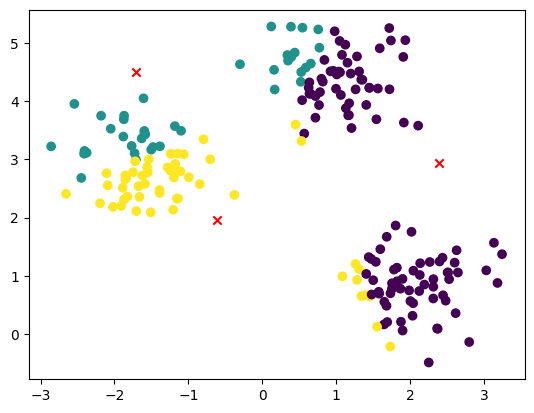

[1. 1. 1. 1. 1. 2. 0. 0. 1. 2. 1. 2. 0. 0. 1. 2. 0. 0. 0. 1. 2. 0. 0. 0.
 2. 1. 0. 2. 1. 2. 0. 1. 2. 1. 0. 0. 1. 0. 0. 2. 0. 2. 2. 1. 0. 0. 1. 2.
 1. 1. 1. 0. 2. 1. 1. 2. 0. 0. 0. 0. 2. 2. 1. 0. 0. 1. 0. 0. 2. 0. 0. 1.
 1. 2. 1. 1. 0. 0. 0. 1. 2. 0. 1. 0. 0. 0. 1. 2. 1. 0. 2. 2. 0. 1. 0. 1.
 0. 2. 2. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 0. 1. 1. 0. 0. 0. 2. 2.
 0. 0. 2. 0. 0. 1. 1. 0. 2. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 2. 1. 2. 0. 0.
 0. 1. 1. 1. 0. 1. 0. 1. 1. 2. 0. 0. 0. 0. 1. 1. 2. 2. 2. 2. 0. 1. 0. 2.
 0. 0. 0. 0. 1. 0. 2. 2. 0. 1. 1. 0. 1. 2. 0. 0. 0. 0. 2. 0. 1. 0. 2. 2.
 0. 0. 0. 0. 1. 0. 0. 0.]
96 59 45
499.41693288107643


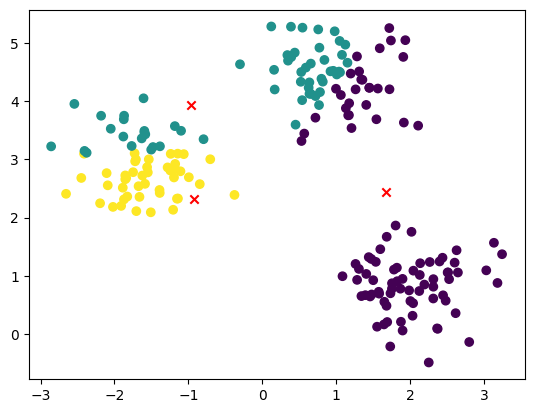

[2. 1. 1. 2. 1. 2. 0. 0. 1. 2. 1. 2. 1. 1. 1. 2. 0. 0. 1. 2. 2. 0. 1. 1.
 2. 1. 0. 2. 2. 2. 1. 1. 2. 1. 0. 0. 1. 0. 0. 2. 0. 2. 2. 2. 1. 1. 1. 2.
 1. 1. 1. 0. 2. 1. 2. 2. 0. 0. 1. 1. 2. 2. 1. 0. 0. 2. 0. 0. 2. 0. 0. 1.
 1. 2. 1. 2. 0. 0. 0. 2. 2. 1. 1. 0. 0. 1. 1. 2. 1. 0. 2. 2. 0. 1. 0. 1.
 1. 2. 2. 0. 0. 1. 2. 1. 2. 1. 0. 1. 1. 0. 1. 2. 0. 1. 1. 1. 1. 0. 2. 2.
 0. 0. 2. 1. 0. 1. 2. 0. 2. 1. 2. 0. 0. 0. 1. 0. 0. 1. 0. 2. 2. 2. 1. 0.
 0. 1. 2. 2. 0. 1. 0. 2. 2. 2. 1. 0. 0. 0. 1. 1. 2. 2. 2. 2. 1. 1. 0. 2.
 0. 0. 1. 0. 1. 0. 2. 2. 0. 2. 1. 0. 1. 2. 0. 0. 0. 0. 2. 0. 1. 1. 2. 2.
 0. 0. 0. 0. 2. 0. 1. 0.]
69 67 64
260.62296516646074


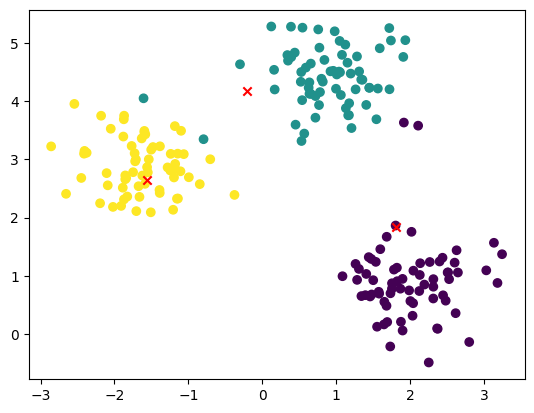

[2. 1. 1. 2. 1. 2. 0. 0. 1. 2. 1. 2. 1. 1. 1. 2. 0. 0. 1. 2. 2. 0. 1. 1.
 2. 1. 0. 2. 2. 2. 1. 1. 2. 1. 0. 0. 1. 0. 0. 2. 0. 2. 2. 2. 1. 1. 1. 2.
 1. 1. 1. 0. 2. 2. 2. 2. 0. 0. 1. 1. 2. 2. 1. 0. 0. 2. 0. 0. 2. 0. 0. 1.
 1. 2. 1. 2. 0. 0. 0. 2. 2. 1. 1. 0. 0. 1. 1. 2. 1. 0. 2. 2. 0. 1. 0. 1.
 1. 2. 2. 0. 0. 1. 2. 1. 2. 1. 0. 1. 1. 0. 1. 2. 0. 2. 1. 1. 1. 0. 2. 2.
 0. 0. 2. 1. 0. 1. 2. 0. 2. 1. 2. 0. 0. 0. 1. 0. 0. 1. 0. 2. 2. 2. 1. 0.
 0. 1. 2. 2. 0. 1. 0. 2. 2. 2. 1. 0. 0. 0. 1. 1. 2. 2. 2. 2. 1. 1. 0. 2.
 0. 0. 1. 0. 1. 0. 2. 2. 1. 2. 1. 0. 1. 2. 0. 0. 0. 1. 2. 0. 1. 1. 2. 2.
 0. 0. 0. 0. 2. 0. 1. 0.]
67 67 66
95.10121078063996


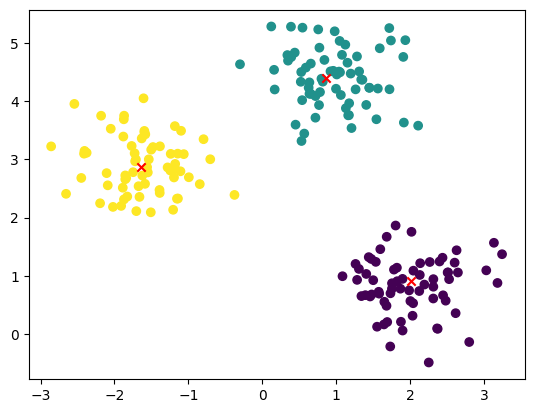

[2. 1. 1. 2. 1. 2. 0. 0. 1. 2. 1. 2. 1. 1. 1. 2. 0. 0. 1. 2. 2. 0. 1. 1.
 2. 1. 0. 2. 2. 2. 1. 1. 2. 1. 0. 0. 1. 0. 0. 2. 0. 2. 2. 2. 1. 1. 1. 2.
 1. 1. 1. 0. 2. 2. 2. 2. 0. 0. 1. 1. 2. 2. 1. 0. 0. 2. 0. 0. 2. 0. 0. 1.
 1. 2. 1. 2. 0. 0. 0. 2. 2. 1. 1. 0. 0. 1. 1. 2. 1. 0. 2. 2. 0. 1. 0. 1.
 1. 2. 2. 0. 0. 1. 2. 1. 2. 1. 0. 1. 1. 0. 1. 2. 0. 2. 1. 1. 1. 0. 2. 2.
 0. 0. 2. 1. 0. 1. 2. 0. 2. 1. 2. 0. 0. 0. 1. 0. 0. 1. 0. 2. 2. 2. 1. 0.
 0. 1. 2. 2. 0. 1. 0. 2. 2. 2. 1. 0. 0. 0. 1. 1. 2. 2. 2. 2. 1. 1. 0. 2.
 0. 0. 1. 0. 1. 0. 2. 2. 1. 2. 1. 0. 1. 2. 0. 0. 0. 1. 2. 0. 1. 1. 2. 2.
 0. 0. 0. 0. 2. 0. 1. 0.]
67 67 66
93.99874702328013


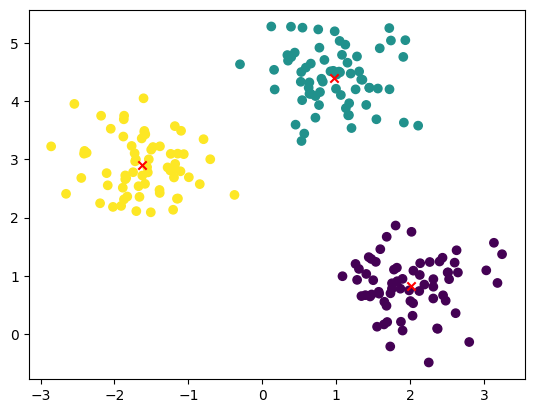

In [ ]:
for j in range(5):
  current_labels = np.array([])
  for i in range(len(X)):
    dist_1 = (X[i, 0]-center_1[0])**2 + (X[i, 1]-center_1[1])**2
    dist_2 = (X[i, 0]-center_2[0])**2 + (X[i, 1]-center_2[1])**2
    dist_3 = (X[i, 0]-center_3[0])**2 + (X[i, 1]-center_3[1])**2
    dist = np.argmin([dist_1, dist_2, dist_3])
    current_labels = np.append(current_labels, dist)
  print(current_labels)
  X_1 = X[current_labels==0]
  X_2 = X[current_labels==1]
  X_3 = X[current_labels==2]
  print(len(X_1), len(X_2), len(X_3))
  err = np.sum((X_1 - center_1)**2)+np.sum((X_2 - center_2)**2)+np.sum((X_3 - center_3)**2)
  print(err)

  plt.scatter(X[:, 0], X[:, 1], c=current_labels)
  plt.scatter([center_1[0], center_2[0], center_3[0]], [center_1[1], center_2[1], center_3[1]], c='red', marker='x')
  plt.show()
  if err < threshold:
    break
  center_1 = X_1.mean(axis=0)
  center_2 = X_2.mean(axis=0)
  center_3 = X_3.mean(axis=0)

In [ ]:
# The final centroids' values
print(f"Centroid 1 - {center_1}")
print(f"Centroid 2 - {center_2}")
print(f"Centroid 3 - {center_3}")

Centroid 1 - [2.00955762 0.8313862 ]
Centroid 2 - [0.96573445 4.39663084]
Centroid 3 - [-1.62597658  2.89784482]


In [ ]:
# sklearn.datasets.make_blob function returned
centers

array([[ 0.97627008,  4.30378733],
       [ 2.05526752,  0.89766366],
       [-1.52690401,  2.91788226]])

In [ ]:
# Using sklearn KMeans implementation for comparing results
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X)
kmeans.labels_


kmeans.cluster_centers_

array([[ 0.96573445,  4.39663084],
       [ 2.00955762,  0.8313862 ],
       [-1.62597658,  2.89784482]])

In [ ]:
print(kmeans.cluster_centers_)
print(center_1, center_2, center_3)

[[ 0.96573445  4.39663084]
 [ 2.00955762  0.8313862 ]
 [-1.62597658  2.89784482]]
[2.00955762 0.8313862 ] [0.96573445 4.39663084] [-1.62597658  2.89784482]
